In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import sklearn

In [2]:
ofisB= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasBCN3.csv")
ofisM= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasMAD3.csv")
ofisM.drop(["Unnamed: 0"],axis=1,inplace=True)
ofisB.drop(["Unnamed: 0"],axis=1,inplace=True)
ofisM.tail()

,ad_price,ad_area,ad_latitude,ad_longitude,censustract_id,ad_postalcode,ad_floornumber,ad_bathnumber,ad_haslift,ad_hasparkingspace,tamaños
1289,17622,1068,40.468191,-3.673292,2.807905e+09,28016.0,6,0,1,0,3
1290,50000,5000,40.513682,-3.672992,2.807908e+09,28050.0,5,0,1,0,3
1291,24172,879,40.447962,-3.696127,2.807906e+09,28020.0,23,0,1,1,3
1292,24310,884,40.448362,-3.695927,2.807906e+09,28020.0,23,0,1,0,3
1293,12768,912,40.485593,-3.670155,2.807916e+09,28050.0,1,0,1,0,3


In [3]:
X_trainM, X_testM, y_trainM, y_testM = train_test_split(ofisM.drop('ad_price', axis=1),
                                                    ofisM['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)
X_trainB, X_testB, y_trainB, y_testB = train_test_split(ofisB.drop('ad_price', axis=1),
                                                    ofisB['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [4]:
from sklearn.feature_selection import SelectKBest

print(X_trainM.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X_trainM, y_trainM)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column':X_trainM.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(1035, 10)
(1035, 5)
[127.02426379  40.26031106  10.17542385  18.08201445  14.01307813
   3.50009398   1.48187105   1.27829935   0.97831044          nan]


c:\Users\cfern\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\cfern\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,column,score
0,ad_area,127.024264
1,ad_latitude,40.260311
3,censustract_id,18.082014
4,ad_postalcode,14.013078
2,ad_longitude,10.175424
5,ad_floornumber,3.500094
6,ad_bathnumber,1.481871
7,ad_haslift,1.278299
8,ad_hasparkingspace,0.978310
9,tamaños,NaN


In [5]:
#vamos a probar que parametros me dna mejor score en un modelo de  arbol regresor entrenandolo con el dataset de oficinas de Madrid 
parameters = {
    'max_depth': np.arange(1, 10),
    'random_state': np.arange(0, 10),
    "min_samples_leaf":  np.arange(2, 10),
    "min_samples_split": np.arange(2, 10)
}


dtr= DecisionTreeRegressor()
kfold = KFold(n_splits=10)

prueba = RandomizedSearchCV(estimator = dtr,
                  param_distributions = parameters,
                  n_jobs = 1,
                  verbose=5,
                  n_iter=100,
                  scoring="neg_mean_absolute_error",
                  cv = kfold)

prueba .fit(X_trainM, y_trainM)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-5669.199 total time=   0.0s
[CV 2/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-6185.703 total time=   0.0s
[CV 3/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-5267.045 total time=   0.0s
[CV 4/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-4935.613 total time=   0.0s
[CV 5/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-5417.384 total time=   0.0s
[CV 6/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-7299.441 total time=   0.0s
[CV 7/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-6214.824 total time=   0.0s
[CV 8/10] END max_depth=6, min_samples_leaf=7, min_samples_split=8, random_state=8;, score=-540

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='neg_mean_absolute_error', verbose=5)

In [6]:

print("Best estimator Madrid:", prueba.best_estimator_.score(X_testM, y_testM))
print("Best params Madrid:", prueba.best_params_)


Best estimator Madrid: 0.8906990306730301
Best params Madrid: {'random_state': 6, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 9}


In [7]:
predsM = prueba.best_estimator_.predict(X_testM)

print('MAE:', mean_absolute_error(y_testM,predsM))
print('MAPE:', mean_absolute_percentage_error(y_testM, predsM))
print('MSE:', mean_squared_error(y_testM, predsM))
print('RMSE:', np.sqrt(mean_squared_error(y_testM, predsM)))

MAE: 4065.6933490733595
MAPE: 0.3512186561349974
MSE: 44090024.28076376
RMSE: 6640.031948775831


In [8]:
#Para Barcelona 
#vamos a probar que parametros me dna mejor score en un modelo de  arbol regresor entrenandolo con el dataset de oficinas de Madrid 
parametersB = {
    'max_depth': np.arange(1, 10),
    'random_state': np.arange(0, 10),
    "min_samples_leaf":  np.arange(2, 10),
    "min_samples_split": np.arange(2, 10)
}


dtrB= DecisionTreeRegressor()
kfoldB = KFold(n_splits=10)

pruebaB = RandomizedSearchCV(estimator = dtrB,
                  param_distributions = parametersB,
                  n_jobs = 1,
                  verbose=5,
                  n_iter=100,
                  scoring="neg_mean_absolute_error",
                  cv = kfoldB)

pruebaB .fit(X_trainB, y_trainB)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-8685.937 total time=   0.0s
[CV 2/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-6997.799 total time=   0.0s
[CV 3/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-6772.791 total time=   0.0s
[CV 4/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-9369.596 total time=   0.0s
[CV 5/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-7213.193 total time=   0.0s
[CV 6/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-6358.400 total time=   0.0s
[CV 7/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-7837.776 total time=   0.0s
[CV 8/10] END max_depth=2, min_samples_leaf=2, min_samples_split=7, random_state=9;, score=-728

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='neg_mean_absolute_error', verbose=5)

In [9]:

print("Best estimator Barcelona:", pruebaB.best_estimator_.score(X_testB, y_testB))
print("Best params Barcelona :", pruebaB.best_params_)

Best estimator Barcelona: 0.8785900815838271
Best params Barcelona : {'random_state': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 9}


In [10]:
predsB = pruebaB.best_estimator_.predict(X_testB)

In [11]:
print('MAE:', mean_absolute_error(y_testB,predsB))
print('MAPE:', mean_absolute_percentage_error(y_testB, predsB))
print('MSE:', mean_squared_error(y_testB, predsB))
print('RMSE:', np.sqrt(mean_squared_error(y_testB, predsB)))

MAE: 5368.872500273942
MAPE: 0.8192446502339417
MSE: 75879627.0830274
RMSE: 8710.891290966005


In [12]:
tree_regM= DecisionTreeRegressor(random_state= 7, min_samples_split= 4, min_samples_leaf= 3, max_depth= 9)
tree_regB= DecisionTreeRegressor(random_state= 8, min_samples_split= 7, min_samples_leaf= 3, max_depth= 9)
tree_regM.fit(X_trainM,y_trainM) 
tree_regB.fit(X_trainB,y_trainB) 

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                      random_state=8)

Text(0.5, 1.0, 'Arbol  oficinas Barcelona ')

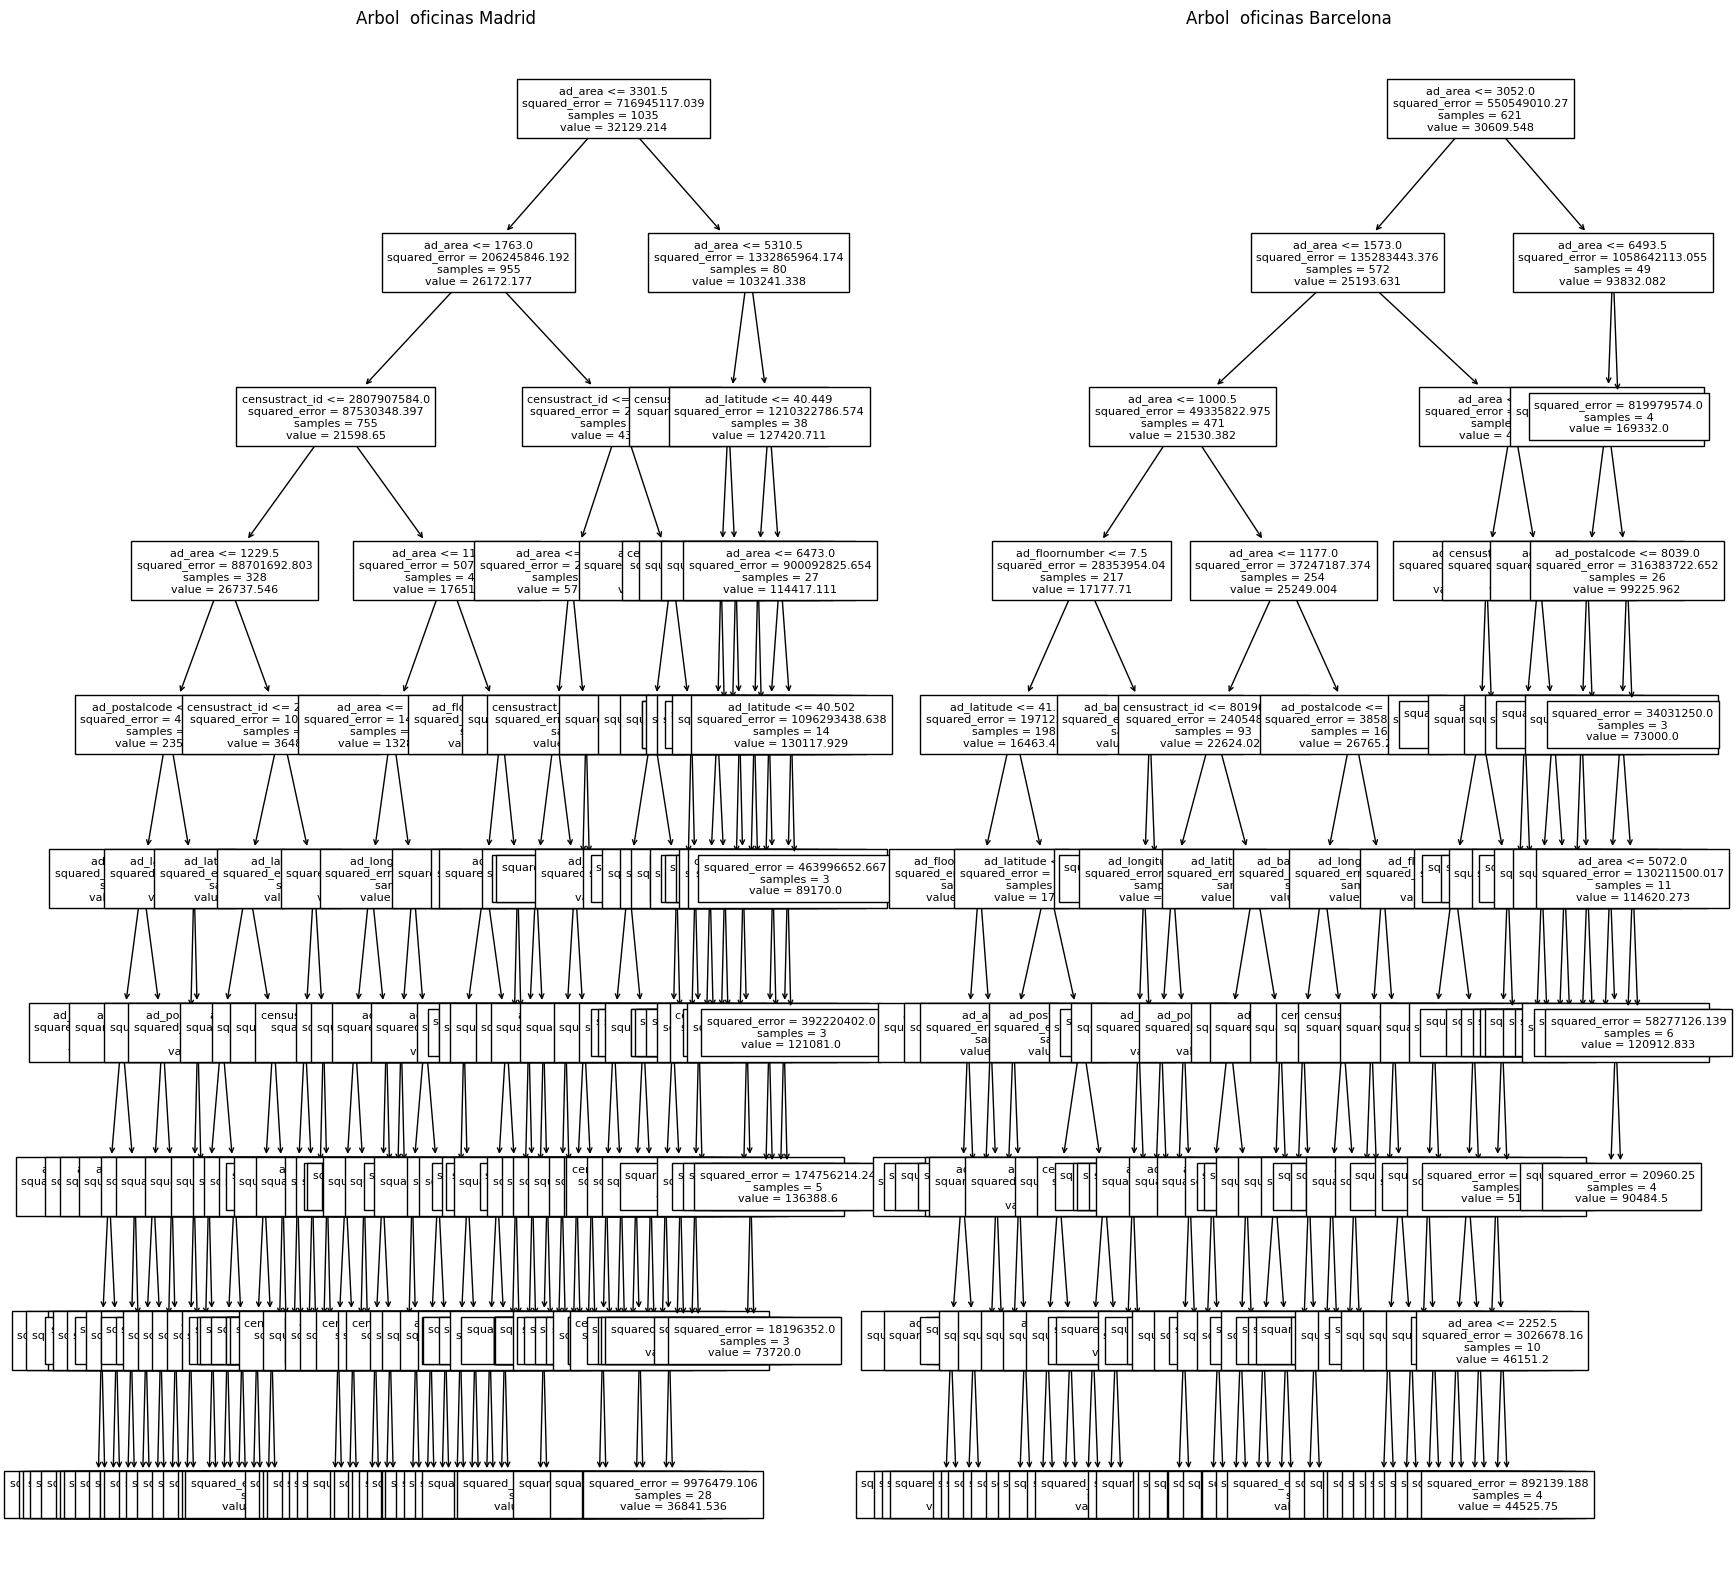

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 20))


sklearn.tree.plot_tree(tree_regM,class_names="actual",feature_names= X_trainM.columns, fontsize = 8,ax=axes[0])
axes[0].set_title("Arbol  oficinas Madrid")
sklearn.tree.plot_tree(tree_regB,class_names="actual",feature_names= X_trainB.columns, fontsize = 8,ax=axes[1]);
axes[1].set_title("Arbol  oficinas Barcelona ")